# Data Exploration

## Experimental Setup

In [1]:
# Setting up execution path
import os

print(f"Current working directory: {os.path.basename(os.getcwd())}")

# Change to root directory
os.chdir("../")
print(f"Current working directory (Changed): {os.path.basename(os.getcwd())}")

Current working directory: notebooks
Current working directory (Changed): Analyzing-Pokemons


In [2]:
from rich import print

In [3]:
from src.constants import CONFIGS
from src.utils.basic_utils import read_yaml

In [4]:
configs = read_yaml(CONFIGS).data_preprocessor
print(configs.to_dict())

[2024-02-24 04:01:31 PM]:ProjectLogger INFO:basic_utils 40 - yaml file: conf\configs.yaml loaded successfully


{'scraped_data_path': 'data/external/scraped_pokemons.csv', 'processed_data_path': 'data/processed/pokemons.csv'}

In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# module setup
%matplotlib inline
pd.options.display.precision = 5
warnings.filterwarnings("ignore")

## Data Ingestion

In [6]:
# Get the CSV filepath from configs
scraped_data_path = configs.scraped_data_path

# Read the CSV data
pokemons_df_main = pd.read_csv(scraped_data_path, index_col=False)

# create a copy of it for working
df = pokemons_df_main.copy(deep=True)

# View a glimpse of the data
df.head()

,rank,name,types,total_power,hit_points,attack,defense,special_attack,special_defense,speed,icon_url,details_url,scrape_ts
0,1,Bulbasaur,"Grass, Poison",318,45,49,49,65,65,45,https://img.pokemondb.net/sprites/scarlet-viol...,https://pokemondb.net/pokedex/bulbasaur,2024-02-24 15:05:21
1,2,Ivysaur,"Grass, Poison",405,60,62,63,80,80,60,https://img.pokemondb.net/sprites/scarlet-viol...,https://pokemondb.net/pokedex/ivysaur,2024-02-24 15:05:21
2,3,Venusaur,"Grass, Poison",525,80,82,83,100,100,80,https://img.pokemondb.net/sprites/scarlet-viol...,https://pokemondb.net/pokedex/venusaur,2024-02-24 15:05:21
3,3,Mega Venusaur,"Grass, Poison",625,80,100,123,122,120,80,https://img.pokemondb.net/sprites/scarlet-viol...,https://pokemondb.net/pokedex/venusaur,2024-02-24 15:05:21
4,4,Charmander,Fire,309,39,52,43,60,50,65,https://img.pokemondb.net/sprites/scarlet-viol...,https://pokemondb.net/pokedex/charmander,2024-02-24 15:05:21


In [10]:
# columns in the data
print(f"The columns in the dataframe are:\n{df.columns.tolist()}")

The columns in the dataframe are:
['rank', 'name', 'types', 'total_power', 'hit_points', 'attack', 'defense', 'special_attack', 'special_defense', 
'speed', 'icon_url', 'details_url', 'scrape_ts']

## Data Structure Analysis

This section is devoted to an initial exploration of the structure of our dataframe. 
Our focus will be on various aspects of the dataframe, such as the number of columns, 
presence of null values, shape, and attributes of the individual fields within the 
dataframe. The goal of this analysis is to identify any potential challenges or issues 
that may arise during further analysis.

We can break down our exploration into two parts:

- **Dataframe Overview**: To gain an understanding of overall dataframe attributes
- **Field Attributes**: To examine the attributes of individual fields within the 
dataframe

With this framework in mind, let's proceed with a closer look at the structure of our 
dataframe.

In [11]:
from src.utils.analysis_utils import dataframe_structure, datatype_details

### Dataframe Details

This section is a crucial one and it provides a high-level overview of the dataframe being analyzed. This section includes important information about the size and structure of the data, as well as any missing or null values in the data. The details of the dataframe that we'll get are as follows:

- **Dimensions**: The number of rows and columns in the dataframe.
- **Shape**: The shape of the dataframe, represented as a tuple (rows, columns).
- **Row Count**: The number of rows in the dataframe.
- **Column Count**: The number of columns in the dataframe.
- **Total Datapoints**: The total number of data points in the dataframe, calculated as the number of rows multiplied by the number of columns.
- **Null Datapoints**: The number of missing or null values in the dataframe.
- **Non-Null Datapoints**: The number of non-missing or non-null values in the dataframe.
- **Total Memory Usage**: The total memory usage of the dataframe, represented in bytes.
- **Average Memory Usage**: The average memory usage of each data point in the dataframe, represented in bytes.

This section provides a quick reference for the dataframe, and helps to identify any potential issues with the data that may need to be addressed in the cleaning process. By having a clear and concise overview of the dataframe, it's easier to move forward with the data cleaning and analysis process.

In [22]:
# Get the dataframe structure details
df_structure = dataframe_structure(df)

# Show table
pd.DataFrame([df_structure]).transpose().rename(columns={0: "Values"})

,Values
Dimensions,2
Shape,"(1215, 13)"
Row Count,1215
Column Count,13
Total Datapoints,15795
Null Datapoints,0
Non-Null Datapoints,15795
Total Memory Usage,596545
Average Memory Usage,42610.0


### Field Details

This section provides a detailed view of the columns in the dataframe, and includes important information that can help with the data cleaning and analysis process. This section is typically used to get an understanding of the data types and distributions of the columns, and to identify any missing or null values that may need to be addressed.

We can use the info() method in pandas to quickly get an understanding of the structure and distribution of the data, and identify any issues that may need to be addressed in the cleaning process.

Additionally, we'll use the function diu.datatype_details() to get a datatype details of the dataframe.

Some of the key information that we'll get from this section are as follows:

- Column Names: A list of the names of all the columns in the dataframe, which can help you to identify any columns that may need to be renamed for clarity or consistency.
- Data types: The datatype of each column in the dataframe, such as integer, float, string, etc. The datatype information is important because it determines how the data can be analyzed and manipulated.
- Non-Null Count: The number of non-null or non-missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high percentage of missing values, which may need to be handled differently in the cleaning process.
- Null Count: The number of null or missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high number of missing values, which may need to be handled differently in the cleaning process.
- Memory Usage: The memory usage of each column in the dataframe, represented in bytes. This information can be useful in determining if there are any columns that are using a large amount of memory, which may need to be optimized for performance.

In [24]:
# Get field details
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rank             1215 non-null   int64 
 1   name             1215 non-null   object
 2   types            1215 non-null   object
 3   total_power      1215 non-null   int64 
 4   hit_points       1215 non-null   int64 
 5   attack           1215 non-null   int64 
 6   defense          1215 non-null   int64 
 7   special_attack   1215 non-null   int64 
 8   special_defense  1215 non-null   int64 
 9   speed            1215 non-null   int64 
 10  icon_url         1215 non-null   object
 11  details_url      1215 non-null   object
 12  scrape_ts        1215 non-null   object
dtypes: int64(8), object(5)
memory usage: 582.6 KB


In [26]:
# Get details of the datatypes
print(datatype_details(df))

There are 8 fields with int64 datatype
There are 5 fields with object datatype

In [27]:
from src.utils.analysis_utils import object_fields_count_stats

In [28]:
# Create boolean mask to get duplicated entries
dup_mask = df.duplicated()

# Apply the mask over dataframe
dup_entries = df[dup_mask]

# Print the results
print(f"There are {len(dup_entries)} duplicated entries in the dataframe")

There are 0 duplicated entries in the dataframe

In [29]:
# Get count statistics for object type fields
count_stats_df = object_fields_count_stats(df)

# View count statistics
count_stats_df

,total_rows,null_rows,not_null_rows,unique_item_count,distinct_item_count
column,,,,,
name,1215,0,1215,1193,1180
types,1215,0,1215,221,50
icon_url,1215,0,1215,1215,1215
details_url,1215,0,1215,1025,872
scrape_ts,1215,0,1215,2,0


In [30]:
from src.utils.analysis_utils import describe_object_fields

In [34]:
# Creating summary statistics
summary_stats = df.describe().transpose()

# Format and show statistics
summary_stats

,count,mean,std,min,25%,50%,75%,max
rank,1215.0,501.73580,298.97908,1.0,240.5,495.0,753.5,1025.0
total_power,1215.0,443.10453,121.19341,175.0,332.0,465.0,521.0,1125.0
hit_points,1215.0,71.24444,26.92782,1.0,52.0,70.0,85.0,255.0
attack,1215.0,81.15226,32.03713,5.0,57.0,80.0,100.0,190.0
defense,1215.0,75.00741,30.74100,5.0,52.0,70.0,91.0,250.0
special_attack,1215.0,73.22469,32.75715,10.0,50.0,65.0,95.0,194.0
special_defense,1215.0,72.44115,27.57819,20.0,51.0,70.0,90.0,250.0
speed,1215.0,70.03457,30.16130,5.0,45.0,68.0,91.0,200.0


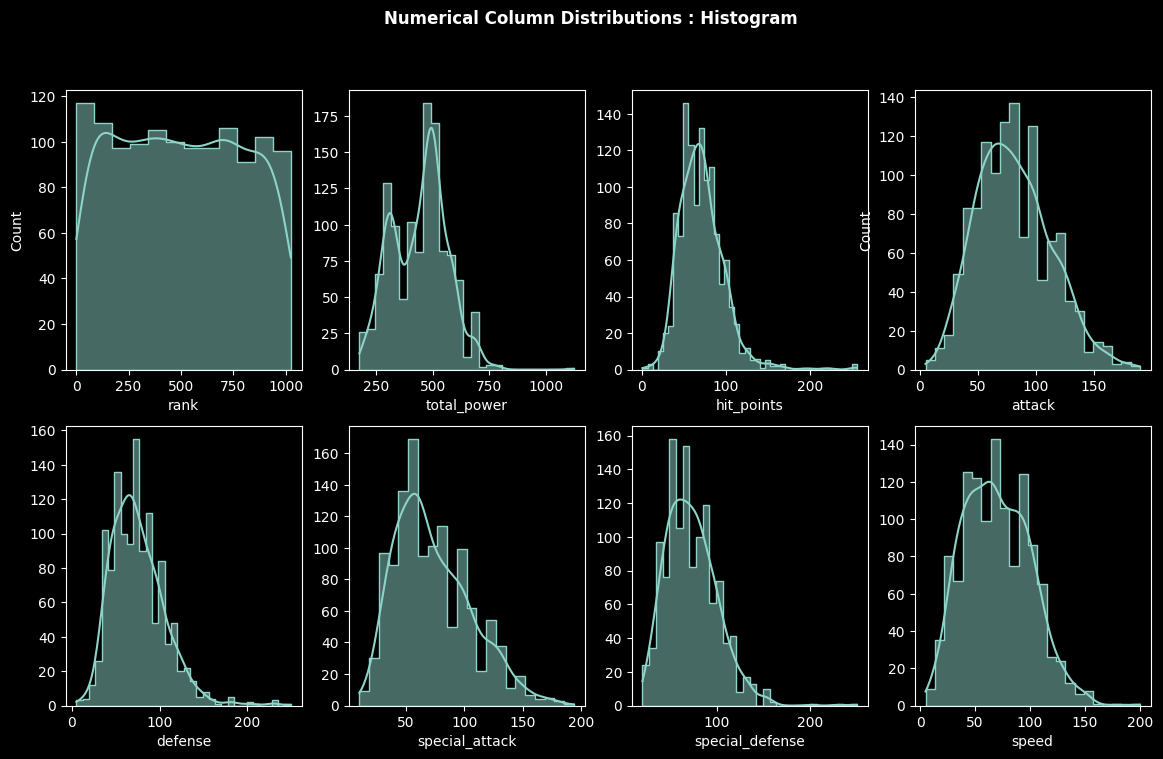

In [37]:
# Select numerical columns in the DataFrame
numerical_cols = df.select_dtypes(include=["int", "float"]).columns.to_list()

# Create a new figure with a specified size
fig = plt.figure(figsize=(14, 8))

# Iterate over numerical columns for subplots
for idx, col in enumerate(numerical_cols):
    # Add a subplot to the figure
    ax = fig.add_subplot(2, 4, idx + 1)

    # Create a histogram using Seaborn for the current column
    sns.histplot(data=df, x=col, ax=ax, element="step", kde="True")

    # Set the y-axis label for the first and fourth subplots
    if (idx + 1) == 1 or (idx + 1) == 4:
        ax.set_ylabel("Count")
    else:
        ax.set_ylabel("")  # Clear the y-axis label for other subplots

# Add a title to the entire figure
fig.suptitle(f"Numerical Column Distributions : Histogram", fontweight="bold")

# Display the figure with subplots
plt.show()

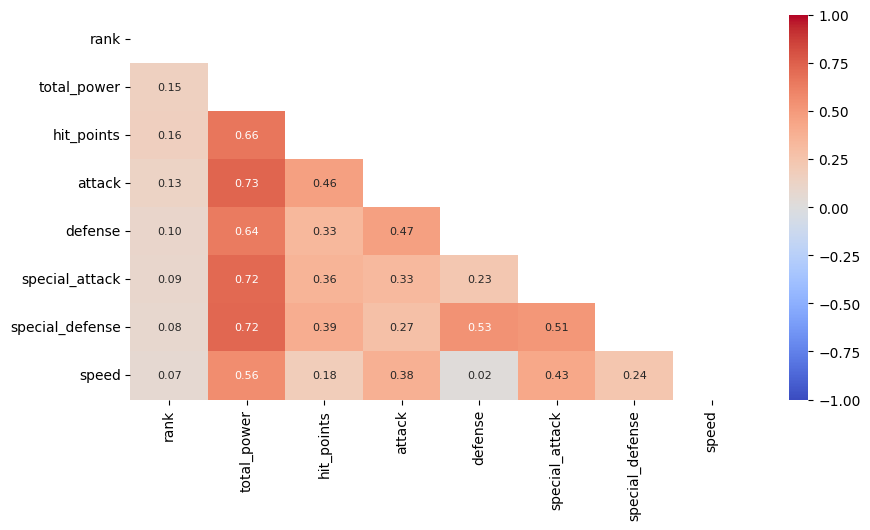

In [38]:
# Set a custom style for the plot
plt.style.use("default")

# Create correlation matrix for features
corr_matrix = df.select_dtypes(include=["int", "float"]).corr()

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot_kws={"size": 8, "ha": "center", "va": "center"},
    fmt=".2f",
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
)

# show plot
plt.show()

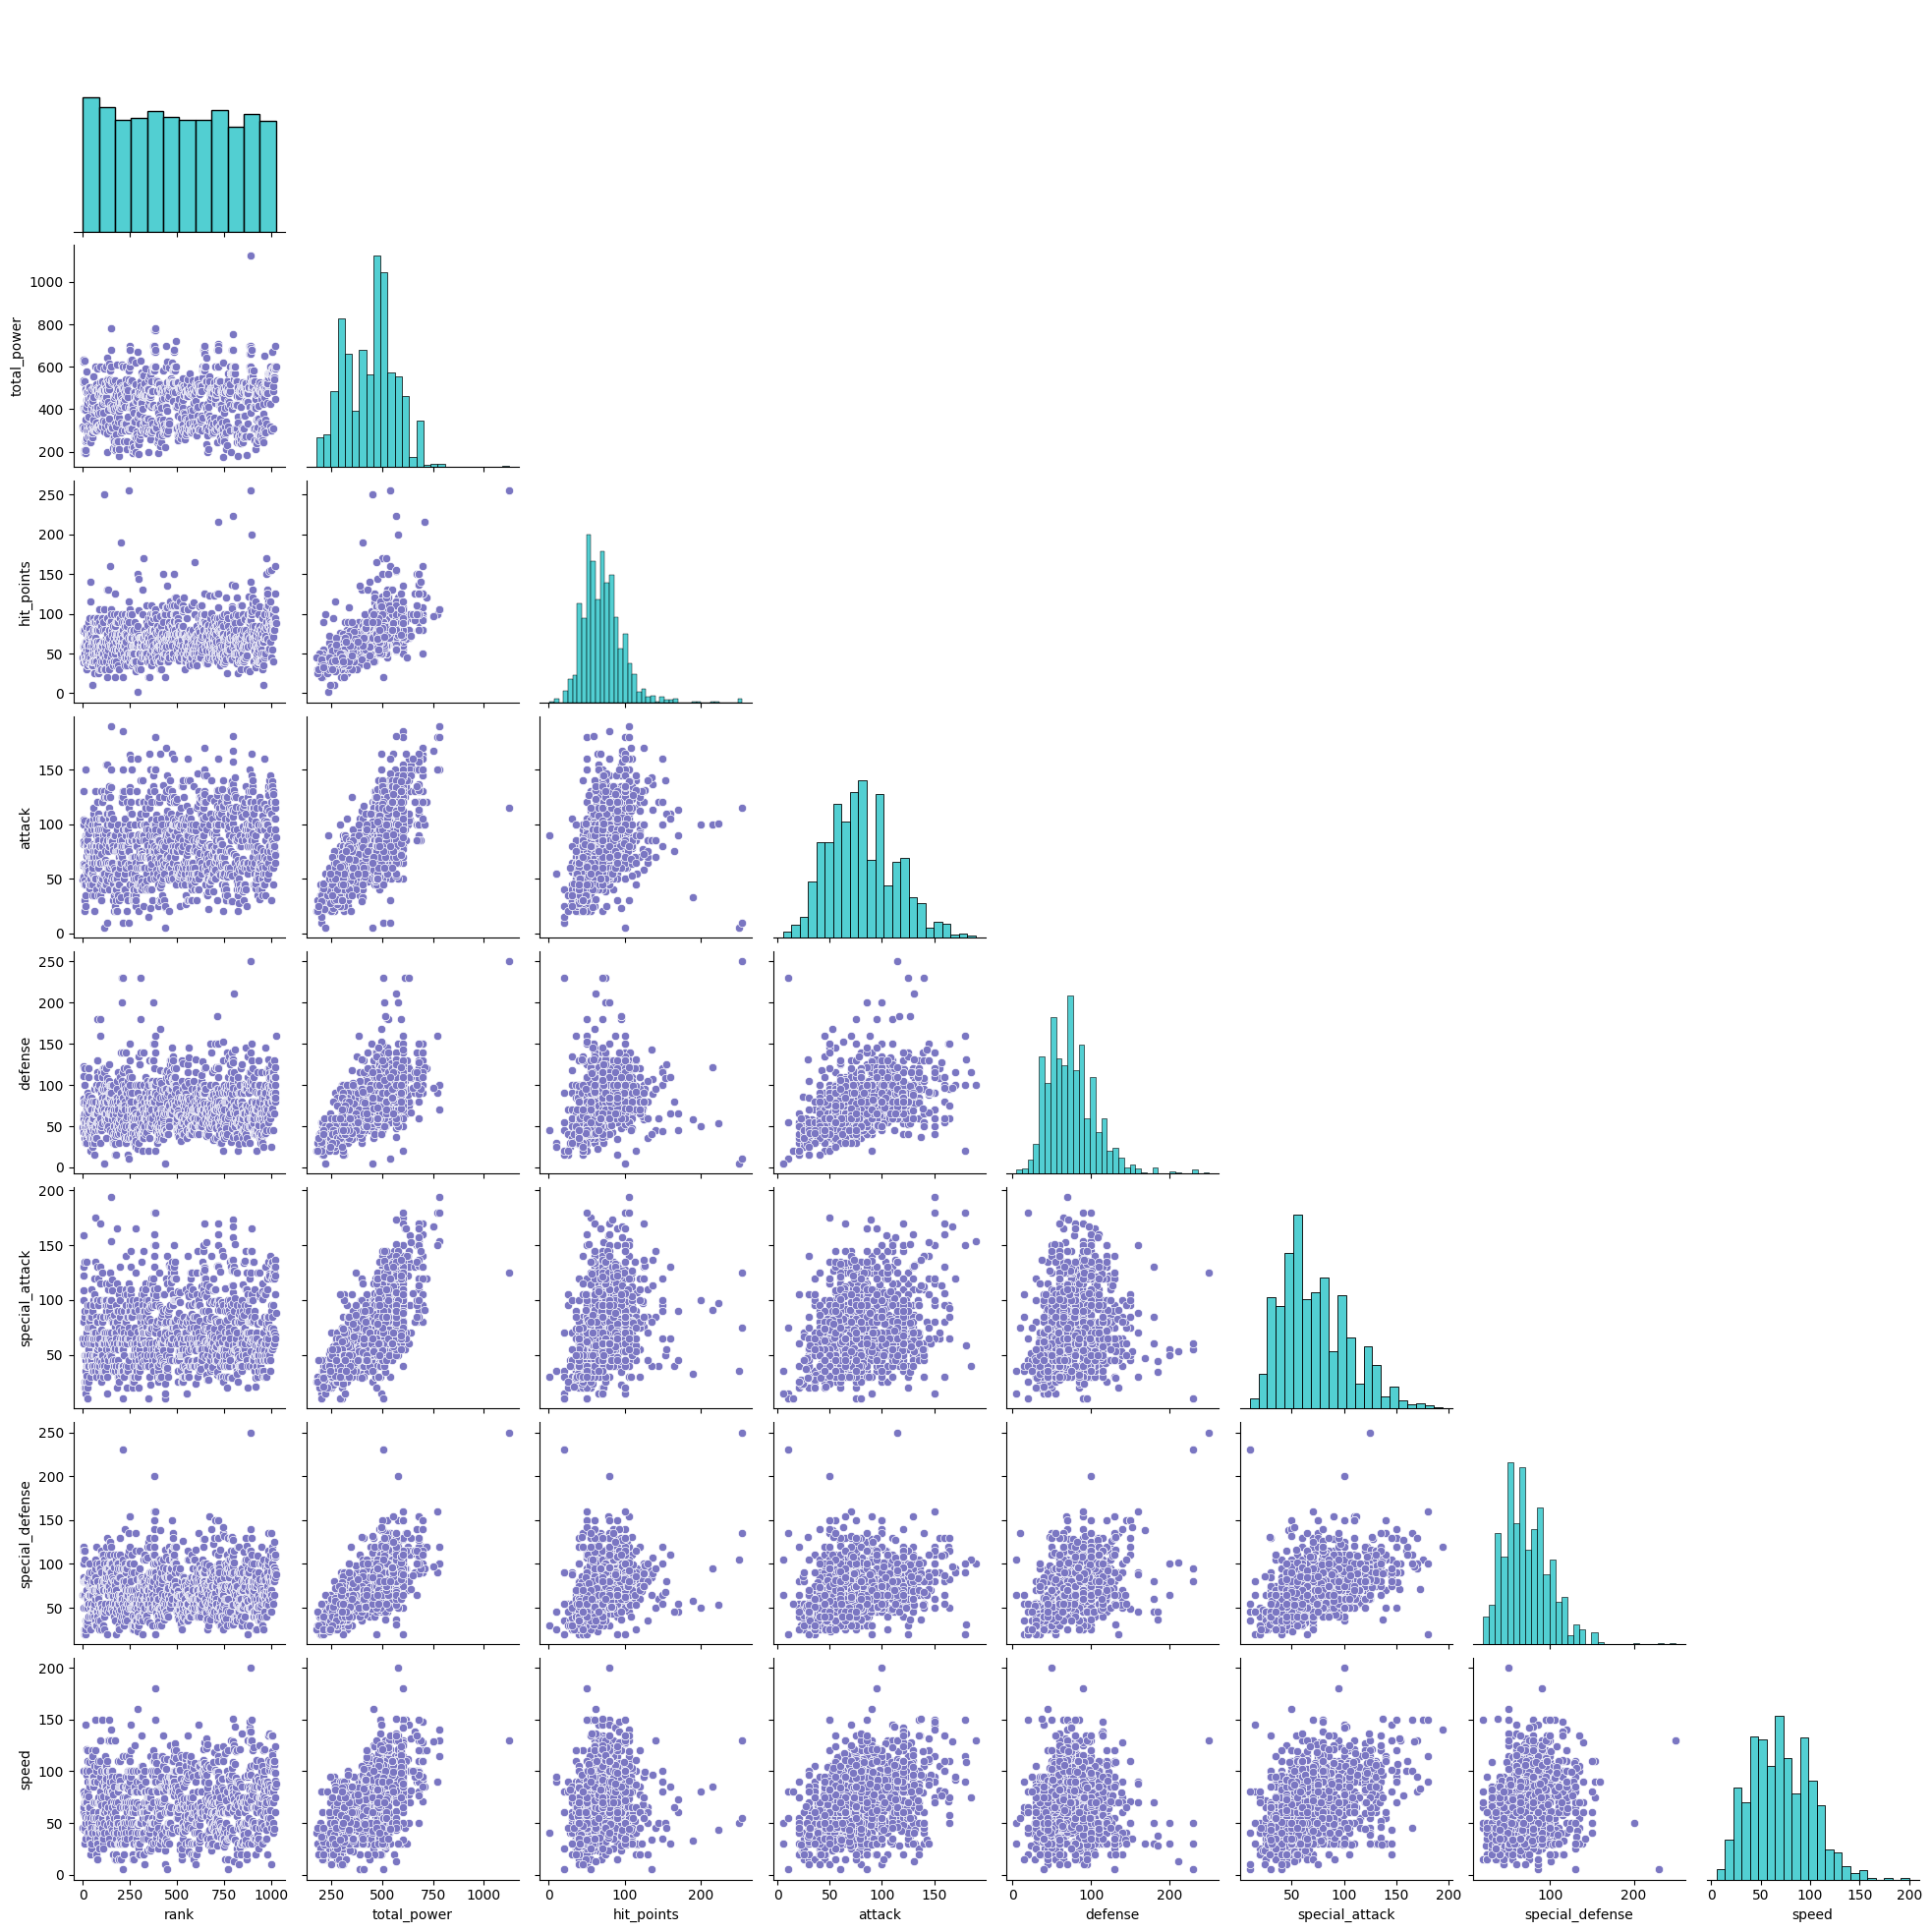

In [39]:
# Set a custom style for the plot

# temporary dataframe copy for visualization
num_cols = df.select_dtypes(include=["int", "float"]).columns

sns.pairplot(
    df,
    vars=num_cols,
    corner=True,
    kind="scatter",
    diag_kind="hist",
    markers="o",
    plot_kws={"color": "#7a76c2"},
    diag_kws={"color": "#18c0c4"},
)

plt.show()